***
## <center>Decision Tree - Cars Category Data</center>
***

### 1. Data Exploration and Preparation 
### 2. Decision Tree
### 3. Support Vector Machine (SVM)
### 4. Artificial Neural Network (ANN)
### 5. Performance Evaluation

***
### 1. Data Exploration and Preparation
***

In [70]:
#memasukan modul yang digunakan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

#set option
%matplotlib inline
pd.set_option("max_rows", 20)

In [71]:
#memasukan data
file = 'cars_category_data.csv'

data = pd.read_csv(file)
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,cheap
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,expensive
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,expensive
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,cheap
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,expensive


In [72]:
#melihat info data 
print(len(data))
print('='*50)
print(data.info())

205
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 no

In [73]:
#memeriksa apakah ada data kosong atau tidak 
data.isnull().any()

make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
                     ...  
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
category             False
Length: 24, dtype: bool

#### Missing values marked by '?'

Sebenarnya pada data ini terdapat missing value pada kolom kategori dengan tanda "?".

However, '?' is not a standard missing value. Pandas does not recognize it as a missing value. Standard missing values such as blank space and 'NA'.

In [74]:
#melihat kolom data yang memiliki missing value "?"
data[['category']].head(10)

,category
0,cheap
1,expensive
2,expensive
3,cheap
4,expensive
5,expensive
6,expensive
7,expensive
8,expensive
9,?


In [75]:
#mengganti missing value "?" dengan NaN
data = data.replace('?', np.nan)
data.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,cheap
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,expensive
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,expensive
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,cheap
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,expensive
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,expensive
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,expensive
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,expensive
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,expensive
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [76]:
#melihat info data 
#dalam hal ini terbukti bahwa ada data missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-nu

#### Remove rows with missing values

In [77]:
#mengeluarkan baris data yang memiliki missing value
data.dropna(axis = 0, inplace = True)

In [78]:
#melihat hasil perubahan setelah missing value dikeluarkan 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
make                 193 non-null object
fuel-type            193 non-null object
aspiration           193 non-null object
num-of-doors         193 non-null object
body-style           193 non-null object
drive-wheels         193 non-null object
engine-location      193 non-null object
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
engine-type          193 non-null object
num-of-cylinders     193 non-null object
engine-size          193 non-null int64
fuel-system          193 non-null object
bore                 193 non-null object
stroke               193 non-null object
compression-ratio    193 non-null float64
horsepower           193 non-null object
peak-rpm             193 non-null object
city-mpg             193 non-nu

In [79]:
#melihat 10 data pertama
data.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,cheap
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,expensive
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,expensive
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,cheap
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,expensive
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,expensive
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,expensive
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,expensive
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,expensive
10,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,expensive


### Convert columns to numeric values

In [80]:
#menyalin data 
data_obj = data.select_dtypes(include = ['object']).copy()
data_obj.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,category
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,cheap
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000,expensive
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000,expensive
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.4,102,5500,cheap
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.4,115,5500,expensive


Total object type: ada 15
<br>#1 - numeric still in string form: bore, stroke, horsepower, peak-rpm, price
<br>#2 - numeric written as string: num-of-doors, num-of-cylinders
<br>#3 - categorical: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system

### Encoding object type #1 
numeric still in string form: bore, stroke, horsepower, peak-rpm

In [81]:
#konversi data dari type object menjadi type data sesungguhnya yaitu float
data['bore'] = data['bore'].astype(str).astype(float)
data['stroke'] = data['stroke'].astype(str).astype(float)
data['horsepower'] = data['horsepower'].astype(str).astype(float)
data['peak-rpm'] = data['peak-rpm'].astype(str).astype(float)
data.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,cheap
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,expensive
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,expensive
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,cheap
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,expensive


In [82]:
#melihat hasil perubahannya
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
make                 193 non-null object
fuel-type            193 non-null object
aspiration           193 non-null object
num-of-doors         193 non-null object
body-style           193 non-null object
drive-wheels         193 non-null object
engine-location      193 non-null object
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
engine-type          193 non-null object
num-of-cylinders     193 non-null object
engine-size          193 non-null int64
fuel-system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 no

### Encoding object type #2 
numeric written as string: num-of-doors, num-of-cylinders 

In [83]:
#melihat kata unik di kolom num-of-doors
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [84]:
#melihat kata unik di kolom num-of-cylinders
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'eight'], dtype=object)

In [85]:
#konversi string "two" to int 2, "four" to 4 etc
cleanup_nums = {"num-of-doors": {"two": 2, "four": 4},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "three":3, "twelve": 12, "eight": 8 }}

data.replace(cleanup_nums, inplace=True)
data.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,cheap
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,expensive
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,expensive
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,cheap
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,expensive
5,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,expensive
6,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,expensive
7,audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,expensive
8,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,expensive
10,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,expensive


In [86]:
#melihat hasil perubahannya
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
make                 193 non-null object
fuel-type            193 non-null object
aspiration           193 non-null object
num-of-doors         193 non-null int64
body-style           193 non-null object
drive-wheels         193 non-null object
engine-location      193 non-null object
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
engine-type          193 non-null object
num-of-cylinders     193 non-null int64
engine-size          193 non-null int64
fuel-system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 non-

### Encoding object type #3
categorical: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system, category

In [87]:
#melihat 10 data pertama
data.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,cheap
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,expensive
2,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,expensive
3,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,cheap
4,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,expensive
5,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,expensive
6,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,expensive
7,audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,expensive
8,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,expensive
10,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,expensive


In [88]:
#melihat kata unik di kolom make
data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [89]:
#merubah data kategorik pada kolom make dengan code
pd.Categorical(data['make']).codes

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20], dtype=int8)

In [90]:
#merubah data kategorik pada kolom make, fuel-type, etc dengan code
data['make'] = pd.Categorical(data['make']).codes
data['fuel-type'] = pd.Categorical(data['fuel-type']).codes
data['aspiration'] = pd.Categorical(data['aspiration']).codes
data['body-style'] = pd.Categorical(data['body-style']).codes
data['drive-wheels'] = pd.Categorical(data['drive-wheels']).codes
data['engine-location'] = pd.Categorical(data['engine-location']).codes
data['wheel-base'] = pd.Categorical(data['wheel-base']).codes
data['engine-type'] = pd.Categorical(data['engine-type']).codes
data['fuel-system'] = pd.Categorical(data['fuel-system']).codes
data['category']=pd.Categorical(data['category']).codes
data.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
0,0,1,0,2,0,2,0,2,168.8,64.1,...,130,4,3.47,2.68,9.0,111.0,5000.0,21,27,0
1,0,1,0,2,0,2,0,2,168.8,64.1,...,130,4,3.47,2.68,9.0,111.0,5000.0,21,27,1
2,0,1,0,2,2,2,0,10,171.2,65.5,...,152,4,2.68,3.47,9.0,154.0,5000.0,19,26,1
3,1,1,0,4,3,1,0,27,176.6,66.2,...,109,4,3.19,3.40,10.0,102.0,5500.0,24,30,0
4,1,1,0,4,3,0,0,26,176.6,66.4,...,136,4,3.19,3.40,8.0,115.0,5500.0,18,22,1
5,1,1,0,2,3,1,0,27,177.3,66.3,...,136,4,3.19,3.40,8.5,110.0,5500.0,19,25,1
6,1,1,0,4,3,1,0,39,192.7,71.4,...,136,4,3.19,3.40,8.5,110.0,5500.0,19,25,1
7,1,1,0,4,4,1,0,39,192.7,71.4,...,136,4,3.19,3.40,8.5,110.0,5500.0,19,25,1
8,1,1,1,4,3,1,0,39,192.7,71.4,...,131,4,3.13,3.40,8.3,140.0,5500.0,17,20,1
10,2,1,0,2,3,2,0,29,176.8,64.8,...,108,4,3.50,2.80,8.8,101.0,5800.0,23,29,1


In [91]:
#melihat hasil perubahannya
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 24 columns):
make                 193 non-null int8
fuel-type            193 non-null int8
aspiration           193 non-null int8
num-of-doors         193 non-null int64
body-style           193 non-null int8
drive-wheels         193 non-null int8
engine-location      193 non-null int8
wheel-base           193 non-null int8
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
engine-type          193 non-null int8
num-of-cylinders     193 non-null int64
engine-size          193 non-null int64
fuel-system          193 non-null int8
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 non-null int64
highway-

In [92]:
#melihat statistika deskriptif 
data.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,12.036269,0.901554,0.181347,3.160622,2.621762,1.326425,0.015544,21.341969,174.326425,65.893782,...,128.124352,2.632124,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,0.316062
std,5.904071,0.298691,0.386308,0.989583,0.870191,0.551679,0.124025,13.071803,12.478593,2.137795,...,41.590452,1.582589,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,0.466147
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,141.100000,60.300000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,8.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,10.000000,166.300000,64.100000,...,98.000000,1.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,0.000000
50%,12.000000,1.000000,0.000000,4.000000,3.000000,1.000000,0.000000,19.000000,173.200000,65.400000,...,120.000000,4.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,0.000000
75%,18.000000,1.000000,0.000000,4.000000,3.000000,2.000000,0.000000,31.000000,184.600000,66.900000,...,146.000000,4.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,1.000000
max,20.000000,1.000000,1.000000,4.000000,4.000000,2.000000,1.000000,49.000000,208.100000,72.000000,...,326.000000,6.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,1.000000


***
## 2. Decision Tree
***

In [93]:
#memasukan modul yang digunakan 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

import graphviz
import imageio
import io
import pydotplus

In [94]:
#membagi data menjadi train dan test
train, test = train_test_split(data, test_size = 0.25)
print('Size Data Train: {} dan Size Data Test: {}'.format(len(train), len(test)))

Size Data Train: 144 dan Size Data Test: 49


In [95]:
#melihat data train
train.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
90,12,0,0,2,3,1,0,10,165.3,63.8,...,103,2,2.99,3.47,21.9,55.0,4800.0,45,50,0
48,7,1,0,4,3,2,0,46,199.6,69.6,...,258,4,3.63,4.17,8.1,176.0,4750.0,15,19,1
19,3,1,0,2,2,1,0,10,155.9,63.6,...,90,1,3.03,3.11,9.6,70.0,5400.0,38,43,0
16,2,1,0,2,3,2,0,35,193.8,67.9,...,209,4,3.62,3.39,8.0,182.0,5400.0,16,22,1
154,18,1,0,4,4,0,0,12,169.7,63.6,...,92,1,3.05,3.03,9.0,62.0,4800.0,27,32,0


In [96]:
#melihat data test
test.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,category
78,11,1,0,2,2,1,0,8,157.3,64.4,...,92,1,2.97,3.23,9.4,68.0,5500.0,31,38,0
191,19,1,0,4,3,1,0,28,180.2,66.9,...,136,4,3.19,3.40,8.5,110.0,5500.0,19,24,0
167,18,1,0,2,1,2,0,22,176.2,65.6,...,146,4,3.62,3.50,9.3,116.0,4800.0,24,30,0
179,18,1,0,2,2,2,0,33,183.5,67.7,...,171,4,3.27,3.35,9.3,161.0,5200.0,19,24,1
82,11,1,1,2,2,1,0,13,173.2,66.3,...,156,5,3.58,3.86,7.0,145.0,5000.0,19,24,0


#### Take and remove target column from training dan testing data as labels

In [97]:
#memisahkan kolom category untuk dijadikan data target
label_train = train.pop('category')
label_test = test.pop('category')

In [98]:
#melihat ukuran data train dan test
print('train.shape: {}, label_train.shape: {}, test.shape: {}, test.shape: {}'.format(train.shape, label_train.shape, test.shape, label_test.shape))

train.shape: (144, 23), label_train.shape: (144,), test.shape: (49, 23), test.shape: (49,)


#### Train decision tree classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br><br>
class **sklearn.tree.DecisionTreeClassifier**(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

In [99]:
#mendefinisikan model 
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=10)

In [100]:
#memfit data train ke dalam model 
model_dt.fit(train, label_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Display the decision tree

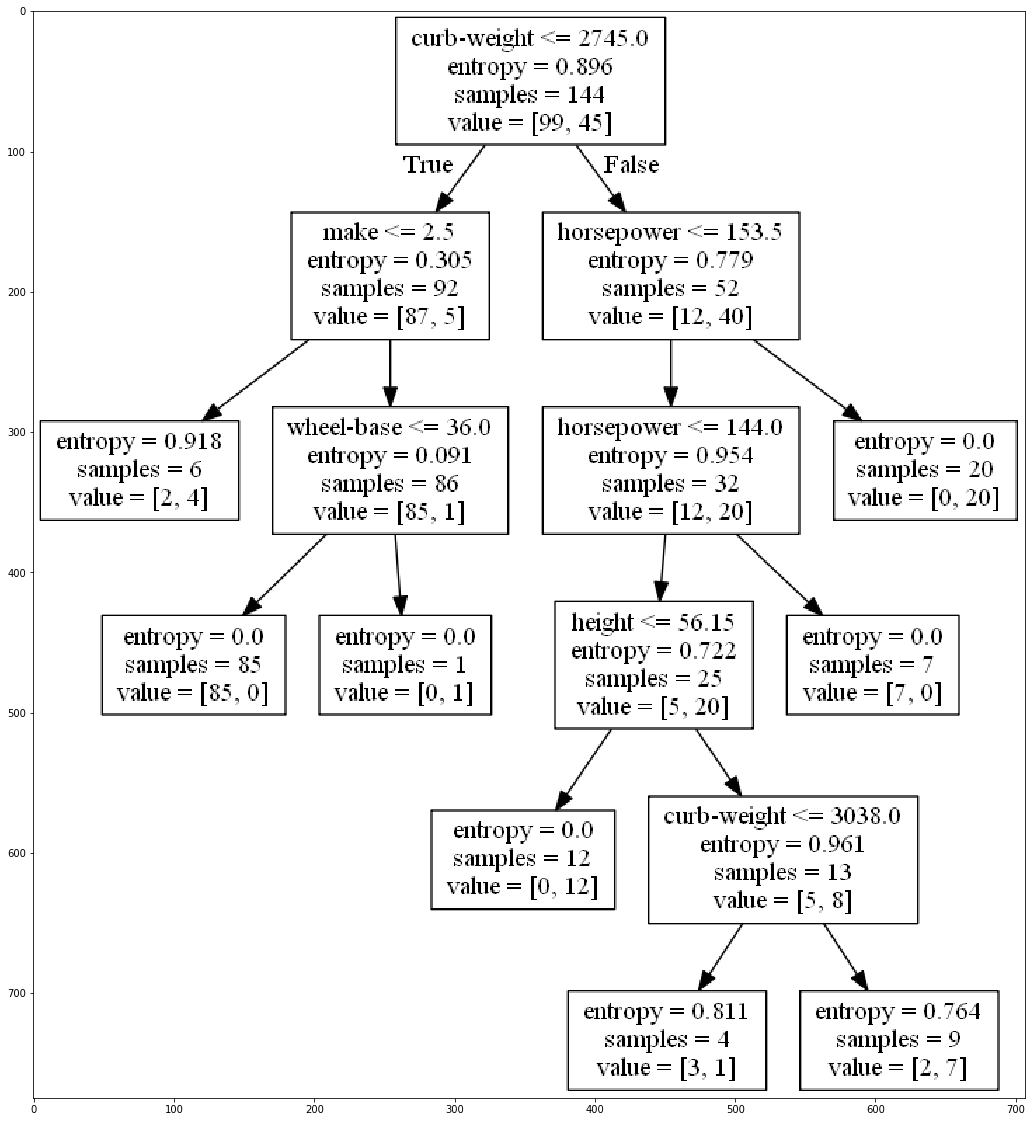

In [101]:
#mendefinisikan fungsi penampil hasil pohon keputusan
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
    
show_tree(model_dt,train.columns,'Hasil_model_dt.png')

#### Measure model accuracy on testing data

In [102]:
#melihat nilai label test
label_test.get_values()

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0], dtype=int8)

In [103]:
#memprediksi data test dengan model dt
prediksi_test = model_dt.predict(test)
prediksi_test

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0], dtype=int8)

In [104]:
#melihat akurasi dari hasil prediksi data test
metrics.accuracy_score(label_test, prediksi_test)*100

93.87755102040816

In [105]:
#melihat akurasi dari hasil prediksi data test dengan cara manual
(len(label_test)-sum(abs(prediksi_test-label_test)))/len(label_test)*100

93.87755102040816

***
## 3. Support Vector Machine (SVM)
***

In [106]:
#memasukan modul yang digunakan
from sklearn.svm import SVC  
from sklearn.preprocessing import MinMaxScaler

#### Train support vector classifier

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<br><br>
class **sklearn.svm.SVC**(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

In [107]:
#mendefinisikan model
#model_svc = SVC(gamma='auto',kernel='sigmoid')
model_svc = SVC(gamma='auto') #kernel="rbf" adalag default

In [108]:
#memfit data train ke dalam model
model_svc.fit(train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Measure model accuracy on testing data

In [109]:
#melihat akurasi dari hasil prediksi data test menggunakan model svc
metrics.accuracy_score(label_test, model_svc.predict(test))

0.7142857142857143

#### Data normalization using min-max scaling

In [110]:
#normalisasi data
scaler = MinMaxScaler()
scaler_train=scaler.fit_transform(train)
scaler_test=scaler.fit_transform(test)

#### Train model on the scaled training data

In [111]:
#mendefinisikan model svc dengan kernel sigmoid
model_svc_1 = SVC(gamma='auto', kernel='sigmoid')

In [112]:
#memfit data train hasil normalisasi ke dalam model svc
model_svc_1.fit(scaler_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Measure model accuracy on scaled testing data

In [113]:
#melihat akurasi dari hasil prediksi data test yang sudah di normalisasi menggunakan model svc
metrics.accuracy_score(label_test, model_svc_1.predict(scaler_test))

0.7346938775510204

***
## 4. Artificial neural network (ANN)
***

#### Brief introduction on Artificial Neural Network:
https://www.saedsayad.com/artificial_neural_network.htm

In [114]:
#memasukan model yang digunakan
from sklearn.neural_network import MLPClassifier

#### Train multi-layer perceptron classifier

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
<br><br>
class **sklearn.neural_network.MLPClassifier**(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

In [115]:
#mendefinisikan model mlp dengan hidden_layer_sizes=(13,13,13), max_iter=500
model_mlp = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)

In [116]:
#memfit data train ke dalam model mlp
model_mlp.fit(train, label_train)

c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Measure model accuracy on testing data

In [117]:
#melihat akurasi dari hasil prediksi data test menggunakan model mlp
metrics.accuracy_score(label_test, model_mlp.predict(test))

0.7551020408163265

#### Train model on the scaled training data

In [118]:
#mendefinisikan model mlp dengan hidden_layer_sizes=(13,), max_iter=500
model_mlp_1 = MLPClassifier(hidden_layer_sizes=(13,), max_iter=500)

In [119]:
#memfit data train yang sudah di normalisasi ke dalam model mlp
model_mlp_1.fit(scaler_train, label_train)

c:\winpython_64bit\python-3.6.5.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Measure model accuracy on scaled testing data

In [120]:
#melihat akurasi dari hasil prediksi data test yang sudah di normalisasi menggunakan model mlp
metrics.accuracy_score(label_test, model_mlp_1.predict(scaler_test))

0.8775510204081632

***
## 5. Performance Evaluation
***

True Positive (TP): actual positive and predicted as positive <br>
False Negative (FN): actual positive and predicted as negative <br>
True Negative (TP): actual negative and predicted as negative <br>
False Positive (FP): actual negative and predicted as positive <br>

Total actual positive: P = TP + FN <br>
Total actual negative: N = FP + TN <br>
Total predicted positive: P' = TP + FP <br>
Total predicted negative: N' = FN + TN <br>
Total samples or tuples: All = P + N = P' + N' <br>

In [121]:
#memasukan modul yang digunakan
from sklearn.metrics import classification_report, confusion_matrix  

#### Measure and display performance evaluation results

In [124]:
#menampilkan hasil confusion matrix
prediksi_scaler_test = model_mlp_1.predict(scaler_test)

print('Confusion Matrix:\n')

print(confusion_matrix(label_test, prediksi_scaler_test))

Confusion Matrix:

[[31  2]
 [ 4 12]]


In [125]:
#menampilkan hasil Classification Report
print('Classification Report:\n')

print(classification_report(label_test, prediksi_scaler_test))

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.86      0.75      0.80        16

    accuracy                           0.88        49
   macro avg       0.87      0.84      0.86        49
weighted avg       0.88      0.88      0.88        49



In [130]:
#menampilkan hasil accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(label_test, prediksi_scaler_test)))

Accuracy: 0.8775510204081632


In [131]:
#menampilkan hasil precision
print('Precision: {}'.format(metrics.precision_score(label_test, prediksi_scaler_test)))

Precision: 0.8571428571428571


In [132]:
#menampilkan hasil recall
print('Recall: {}'.format(metrics.recall_score(label_test, prediksi_scaler_test)))

Recall: 0.75


In [133]:
#menampilkan hasil F1-Score
print('F1-Score: {}'.format(metrics.f1_score(label_test, prediksi_scaler_test)))

F1-Score: 0.7999999999999999


            ##Semoga Bermanfaat
            ##@Raspiani_